In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Approach 1

In [52]:
def generate_synthetic_ms1_data(num_peaks=3, num_spectra_per_peak=10, num_mz_points=8, rt_range=(0, 30), mz_range=(500, 600), intensity_range=(1000, 100000)):
    """
    Generate synthetic MS1 dataset with peaks composed of multiple non-overlapping spectra.
    
    Parameters:
    - num_peaks: Number of peaks to generate (3 in this case)
    - num_spectra_per_peak: Number of spectra contributing to each peak (10)
    - num_mz_points: Number of m/z values per spectrum (8)
    - rt_range: Tuple specifying the range of Retention Time (RT)
    - mz_range: Tuple specifying the range of m/z values
    - intensity_range: Tuple specifying the intensity range for each spectrum

    Returns:
    - rt_values: Retention Time values (x-axis)
    - mz_values: m/z values (y-axis)
    - intensities: Intensity values (2D array for heatmap)
    """
    # Initialize retention time (RT) and m/z values
    rt_values = np.linspace(rt_range[0], rt_range[1], num_spectra_per_peak * num_peaks)
    mz_values = np.linspace(mz_range[0], mz_range[1], num_mz_points)
    
    # Initialize intensities array
    intensities = np.zeros((len(rt_values), len(mz_values)))
    
    # Generate peaks
    peak_centers = np.linspace(mz_range[0], mz_range[1], num_peaks)  # m/z centers for the peaks

    # For each peak
    for peak_idx, peak_center in enumerate(peak_centers):
        # For each spectrum in the peak
        for spectra_idx in range(num_spectra_per_peak):
            # Each spectrum has the same m/z values
            spectrum_mz_values = mz_values  # m/z values stay the same across spectra in a peak

            # Random intensities for each spectrum (one intensity value for each m/z value)
            spectrum_intensities = np.random.uniform(intensity_range[0], intensity_range[1], num_mz_points)
            
            # Define the RT value for this spectrum (non-overlapping RT range)
            rt_index = peak_idx * num_spectra_per_peak + spectra_idx
            intensities[rt_index, :] = spectrum_intensities  # Assign intensity values to the RT and m/z values

    # Create "gaps" in between spectra (RT direction) and m/z points
    new_intensities = np.zeros((len(rt_values) * 2 - 1, len(mz_values) * 2 - 1))

    for rt_idx in range(len(rt_values)):
        for mz_idx in range(len(mz_values)):
            new_intensities[rt_idx * 2, mz_idx * 2] = intensities[rt_idx, mz_idx]

    return rt_values, mz_values, new_intensities


In [53]:
def plot_ms1_heatmap(rt_values, mz_values, intensities):
    """
    Plot the synthetic MS1 data as a 2D heatmap of RT vs. m/z.
    
    Parameters:
    - rt_values: Retention time (x-axis)
    - mz_values: m/z values (y-axis)    
    - intensities: Intensity values for the heatmap
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(intensities, aspect='auto', cmap='PuBu', extent=[rt_values[0], rt_values[-1], mz_values[0], mz_values[-1]], origin='lower')
    plt.colorbar(label='Intensity')
    plt.xlabel('Retention Time (RT)')
    plt.ylabel('m/z')
    plt.title('Synthetic MS1 Data Heatmap')
    plt.show()

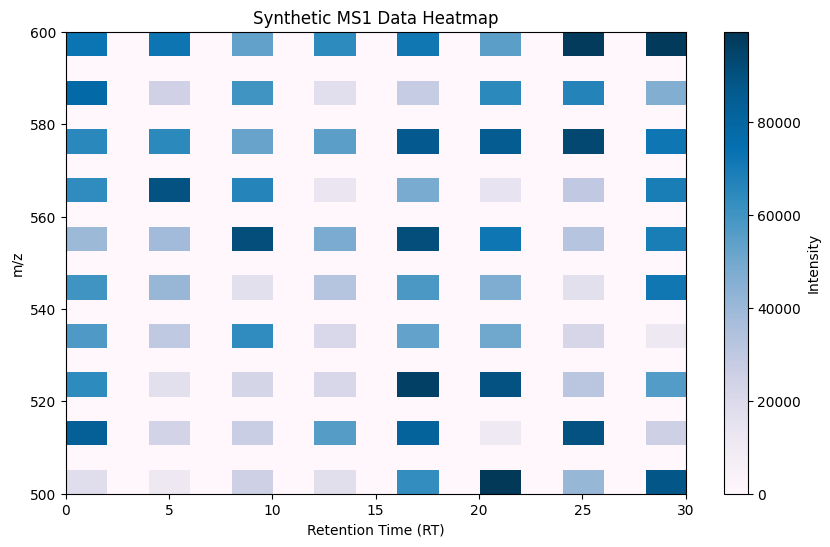

In [54]:
# Example usage: Generate and plot synthetic MS1 data
rt_values, mz_values, intensities = generate_synthetic_ms1_data(num_peaks=1, num_spectra_per_peak=10, num_mz_points=8, rt_range=(0, 30), mz_range=(500, 600), intensity_range=(10000, 100000))
plot_ms1_heatmap(rt_values, mz_values, intensities)

## Approach 2

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

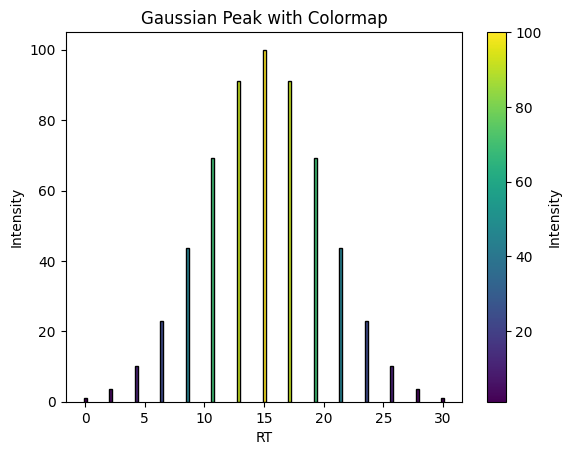

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define RT values (evenly spaced)
num_points = 15
rt_values = np.linspace(0, 30, num_points)

# Gaussian function
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Parameters for the peak
mu = 15       # Peak center
sigma = 5     # Peak width
amplitude = 100  # Peak height

# Compute intensity values
intensity_values = gaussian(rt_values, mu, sigma, amplitude)

# Normalize intensities for colormap
norm = plt.Normalize(vmin=min(intensity_values), vmax=max(intensity_values))
cmap = cm.viridis

# Create figure and axis
fig, ax = plt.subplots()

# Plot as bar chart with colormap
bars = ax.bar(rt_values, intensity_values, width=0.25, color=cmap(norm(intensity_values)), edgecolor='black')

# Create a colorbar using ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Intensity")

# Labels
ax.set_xlabel("RT")
ax.set_ylabel("Intensity")
ax.set_title("Gaussian Peak with Colormap")

plt.show()


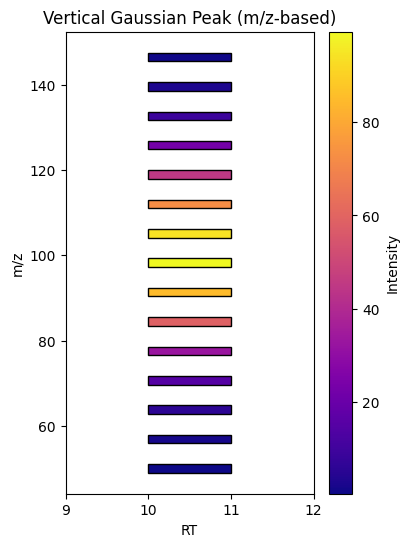

In [57]:
# Function to generate a vertical Gaussian
def generate_gaussian_mz(num_mz_points=30, mz_range=(50, 150), mu=100, sigma=15, amplitude=100):
    # Generate m/z values (evenly spaced)
    mz_values = np.linspace(mz_range[0], mz_range[1], num_mz_points)

    # Apply binning effect by setting every second m/z value to NaN
    mz_values_binned = mz_values.copy()
    mz_values_binned[1::2] = np.nan  # Set every second value to NaN

    # Compute Gaussian intensity values
    intensity_values = amplitude * np.exp(-((mz_values_binned - mu) ** 2) / (2 * sigma ** 2))

    # Filter out NaN values from both m/z and intensity values
    valid_mz_values = mz_values_binned[~np.isnan(mz_values_binned)]
    valid_intensity_values = intensity_values[~np.isnan(mz_values_binned)]

    return valid_mz_values, valid_intensity_values

# Generate Gaussian peak data
mz_values, intensity_values = generate_gaussian_mz()

# Mask NaN values for proper plotting
masked_intensity = np.ma.masked_invalid(intensity_values)

# Normalize intensities for colormap
norm = plt.Normalize(vmin=np.nanmin(intensity_values), vmax=np.nanmax(intensity_values))
cmap = cm.plasma  # Warm colormap
colors = cmap(norm(masked_intensity))

# Define RT position for the peak
rt_value = 10  

# Create figure and axis
fig, ax = plt.subplots(figsize=(4, 6))

# Plot vertical bars
ax.barh(mz_values, [1] * len(mz_values), left=rt_value, height=2, color=colors, edgecolor='black')

# Labels
ax.set_xlabel("RT")
ax.set_ylabel("m/z")
ax.set_title("Vertical Gaussian Peak (m/z-based)")
ax.set_xlim(rt_value - 1, rt_value + 2)  # Adjust x limits for clarity

# Create colorbar with explicit axis reference
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Intensity")

plt.show()

In [58]:
# Function to generate multiple Gaussian peaks at different RT values
def generate_gaussian_peaks(num_rt_points=15, rt_range=(0, 30), **gaussian_params):
    # Initialize an empty list to store DataFrame rows
    data = []
    
    # Generate RT values (evenly spaced)
    rt_values = np.arange(rt_range[0], rt_range[1], 2)  # Simple every second RT
    
    for rt in rt_values:
        # Generate the m/z values and intensity for each RT
        mz_values, intensity_values = generate_gaussian_mz(**gaussian_params)
        
        # Append the RT value, m/z values, and intensity values as a row to the data list
        data.append([rt, mz_values.tolist(), intensity_values.tolist()])
    
    # Convert the data into a pandas DataFrame
    df = pd.DataFrame(data, columns=['RT', 'm/z values', 'Intensity values'])
    
    return df

# Example usage: Generate Gaussian peaks and store in DataFrame
gaussian_params = {
    'num_mz_points': 30,
    'mz_range': (50, 150),
    'mu': 100,
    'sigma': 15,
    'amplitude': 100
}
df = generate_gaussian_peaks(num_rt_points=15, rt_range=(0, 30), **gaussian_params)

# Display the resulting DataFrame
# print(df)

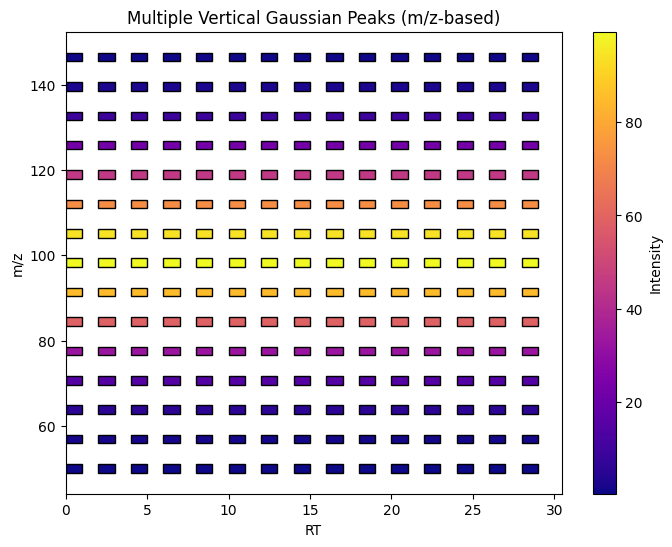

In [59]:
def plot_gaussian_peaks(df):
    """
    Visualizes all the m/z Gaussians per RT value in one joint plot with colormap coding based on intensity values.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing RT values, m/z values, and intensity values.
    """
    # Normalize the intensities for colormap
    all_intensities = np.concatenate(df['Intensity values'].values)  # Flatten all intensity values
    norm = plt.Normalize(vmin=np.nanmin(all_intensities), vmax=np.nanmax(all_intensities))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Iterate through the DataFrame and plot each Gaussian
    for index, row in df.iterrows():
        rt_value = row['RT']
        mz_values = row['m/z values']
        intensity_values = row['Intensity values']

        # Mask NaN intensities
        valid_mz_values = mz_values
        valid_intensity_values = intensity_values

        # Apply colormap based on intensity
        colors = cmap(norm(valid_intensity_values))

        # Plot the vertical bars for each RT
        ax.barh(valid_mz_values, [1] * len(valid_mz_values), left=rt_value, height=2, color=colors, edgecolor='black')

    # Labels
    ax.set_xlabel("RT")
    ax.set_ylabel("m/z")
    ax.set_title("Multiple Vertical Gaussian Peaks (m/z-based)")

    # Create colorbar for intensity
    sm = cm.ScalarMappable(cmap=cm.plasma, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("Intensity")
    
    # Show the plot
    plt.show()

plot_gaussian_peaks(df)